In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns



In [ ]:
df_r1 = pd.read_csv('WITHOUTA1A2A3.csv')
             
df_r1.shape

(400, 23)

In [ ]:
df_r1.head() 

,Employee Code,Employee_Name,Interim Manager,Band,Department,Designation,Process,Education Field,Gender,Age,Salary,Rating,Happiness index,Distance from current Address,Attrition Status,Date Of Joining,Date of Attrition,LWD,Exit interview comments - HR,Over18,Stock Option Level,Direct Report,Marital Status
0,598558,QYFHBFMD IBZVSNCC,NaN,Manager,Operations,Executive,Medical Transcription,Technical,Male,40,High,A,4,6,No,01/11/2008,NaN,NaN,NaN,Y,1.0,NaN,1
1,501329,HKKAYAYE VCHQJVAG,NaN,P2,Operations,Executive Assistant,Medical Transcription,Medical,Male,46,Very High,A,4,2,No,03/03/2008,NaN,NaN,NaN,Y,NaN,NaN,1
2,194885,DMNLDQYI ASROVLIO,NaN,P1,PFS 1,Team Lead,Medical Transcription,Arts,Male,37,High,A,4,5,No,10/03/2008,NaN,NaN,NaN,Y,1.0,NaN,1
3,480091,DTMDDKVJ HGVZGKBW,NaN,P1,MT,Business Analyst,Medical Transcription,Technical,Male,51,High,A,4,2,No,10/03/2008,NaN,NaN,NaN,Y,NaN,NaN,1
4,808186,JABMATQP PJDMGIOW,NaN,P2,FCC,Manager,Medical Transcription,Others,Female,56,Very High,B,4,4,No,17/03/2008,NaN,NaN,NaN,Y,NaN,NaN,1


In [ ]:
df_r1.dtypes

Employee Code                      int64
Employee_Name                     object
Interim Manager                  float64
Band                              object
Department                        object
Designation                       object
Process                           object
Education Field                   object
Gender                            object
Age                                int64
Salary                            object
Rating                            object
Happiness index                    int64
Distance from current Address      int64
Attrition Status                  object
Date Of Joining                   object
Date of Attrition                 object
LWD                               object
Exit interview comments - HR     float64
Over18                            object
Stock Option Level               float64
Direct Report                    float64
Marital Status                     int64
dtype: object

In [ ]:
df_r1.isnull().sum()

Employee Code                      0
Employee_Name                      0
Interim Manager                  400
Band                               0
Department                         0
Designation                        0
Process                            0
Education Field                    0
Gender                             0
Age                                0
Salary                             0
Rating                             0
Happiness index                    0
Distance from current Address      0
Attrition Status                   0
Date Of Joining                    0
Date of Attrition                340
LWD                              340
Exit interview comments - HR     400
Over18                             0
Stock Option Level               350
Direct Report                    400
Marital Status                     0
dtype: int64

In [ ]:
df_r1.drop('Employee Code', axis=1, inplace=True)
df_r1.drop('Employee_Name', axis=1, inplace=True)
df_r1.drop('Interim Manager', axis=1, inplace=True)
df_r1.drop('Over18', axis=1, inplace=True)
df_r1.drop('Stock Option Level', axis=1, inplace=True)
df_r1.drop('Direct Report', axis=1, inplace=True)
df_r1.drop('Date Of Joining', axis=1, inplace=True)
df_r1.drop('Date of Attrition', axis=1, inplace=True)
df_r1.drop('LWD', axis=1, inplace=True)
df_r1.drop('Exit interview comments - HR', axis=1, inplace=True)
df_r1.drop('Process', axis=1, inplace=True)

In [ ]:
df_r1.isnull().sum()

Band                             0
Department                       0
Designation                      0
Education Field                  0
Gender                           0
Age                              0
Salary                           0
Rating                           0
Happiness index                  0
Distance from current Address    0
Attrition Status                 0
Marital Status                   0
dtype: int64

In [ ]:
df_r1=df_r1.dropna()
df_r1.isnull().sum()

Band                             0
Department                       0
Designation                      0
Education Field                  0
Gender                           0
Age                              0
Salary                           0
Rating                           0
Happiness index                  0
Distance from current Address    0
Attrition Status                 0
Marital Status                   0
dtype: int64

In [ ]:
df_r1.shape

(400, 12)

In [ ]:
df_r1['Attrition Status'] = df_r1['Attrition Status'].map({'No':0, 'Yes':1})

In [ ]:
df_r1.describe()

,Age,Happiness index,Distance from current Address,Attrition Status,Marital Status
count,400.000000,400.000000,400.000000,400.000000,400.0
mean,41.450000,4.067500,3.410000,0.150000,1.0
std,9.102452,0.684921,1.425475,0.357519,0.0
min,28.000000,2.000000,1.000000,0.000000,1.0
25%,33.000000,4.000000,2.000000,0.000000,1.0
50%,40.000000,4.000000,3.000000,0.000000,1.0
75%,49.000000,4.000000,4.000000,0.000000,1.0
max,60.000000,5.000000,8.000000,1.000000,1.0


In [ ]:

df_r1.head()

,Band,Department,Designation,Education Field,Gender,Age,Salary,Rating,Happiness index,Distance from current Address,Attrition Status,Marital Status
0,Manager,Operations,Executive,Technical,Male,40,High,A,4,6,0,1
1,P2,Operations,Executive Assistant,Medical,Male,46,Very High,A,4,2,0,1
2,P1,PFS 1,Team Lead,Arts,Male,37,High,A,4,5,0,1
3,P1,MT,Business Analyst,Technical,Male,51,High,A,4,2,0,1
4,P2,FCC,Manager,Others,Female,56,Very High,B,4,4,0,1


In [ ]:
df_dummy = pd.get_dummies(df_r1)
df_dummy.head()

,Age,Happiness index,Distance from current Address,Attrition Status,Marital Status,Band_Manager,Band_P1,Band_P2,Department_FCC,Department_IT,Department_MT,Department_Operations,Department_PFS 1,Department_PFS 2,Department_SD,Department_Support,Designation_Analyst,Designation_Business Analyst,Designation_Coding Analyst,Designation_Executive,Designation_Executive Assistant,Designation_Manager,Designation_Senior Analyst,Designation_Team Lead,Education Field_Arts,Education Field_Commerce,Education Field_Management,Education Field_Medical,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Good,Salary_High,Salary_Very High,Rating_A,Rating_B
0,40,4,6,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,46,4,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
2,37,4,5,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0
3,51,4,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,56,4,4,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1


In [ ]:
for col in df_dummy.columns: 
    print(col) 

Age
Happiness index
Distance from current Address
Attrition Status
Marital Status
Band_Manager
Band_P1
Band_P2
Department_FCC
Department_IT
Department_MT
Department_Operations
Department_PFS 1
Department_PFS 2
Department_SD
Department_Support
Designation_Analyst
Designation_Business Analyst
Designation_Coding Analyst
Designation_Executive
Designation_Executive Assistant
Designation_Manager
Designation_Senior Analyst
Designation_Team Lead
Education Field_Arts
Education Field_Commerce
Education Field_Management
Education Field_Medical
Education Field_Others
Education Field_Technical
Gender_Female
Gender_Male
Salary_Good
Salary_High
Salary_Very High
Rating_A
Rating_B


In [ ]:
df_r1_model = df_dummy

y = df_r1_model['Attrition Status']
X = df_r1_model.drop('Attrition Status', axis=1, inplace=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()

col_names = ['Age', 'Happiness index', 'Distance from current Address', 'Marital Status']

features = X_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_scaled[col_names] = features
X_scaled.head()

,Age,Happiness index,Distance from current Address,Marital Status,Band_Manager,Band_P1,Band_P2,Department_FCC,Department_IT,Department_MT,Department_Operations,Department_PFS 1,Department_PFS 2,Department_SD,Department_Support,Designation_Analyst,Designation_Business Analyst,Designation_Coding Analyst,Designation_Executive,Designation_Executive Assistant,Designation_Manager,Designation_Senior Analyst,Designation_Team Lead,Education Field_Arts,Education Field_Commerce,Education Field_Management,Education Field_Medical,Education Field_Others,Education Field_Technical,Gender_Female,Gender_Male,Salary_Good,Salary_High,Salary_Very High,Rating_A,Rating_B
0,-0.159497,-0.098675,1.819213,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,0.500491,-0.098675,-0.990382,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
2,-0.489491,-0.098675,1.116814,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0
3,1.050482,-0.098675,-0.990382,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,1.600472,-0.098675,0.414415,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

LOGISTIC REGRESSION WITHOUT PCA

In [ ]:
from sklearn.linear_model import LogisticRegression

import time
start = time.time()

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

end = time.time()
logreg_time = end-start
print('Train Time (seconds) of Logistic Regression without PCA:',logreg_time)

Train Time (seconds) of Logistic Regression without PCA: 0.021408796310424805


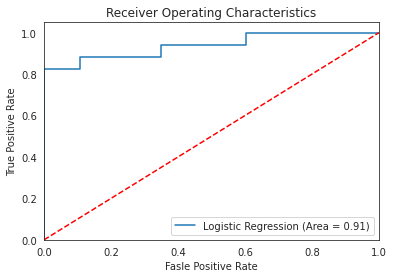


Confusion Matrix
[[103   0]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.82      0.90        17

    accuracy                           0.97       120
   macro avg       0.99      0.91      0.94       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_logreg = logreg.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)
print("\nConfusion Matrix")
print(confusion_matrix_logreg)

classify_logreg = classification_report(y_test, y_pred_logreg)
print("\nClassification Report")
print(classify_logreg)

DECISION TREE WITHOUT PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()

dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

end = time.time()
dectree_time = end-start
print('Train Time (seconds) of Decision Tree without PCA:',dectree_time)

Train Time (seconds) of Decision Tree without PCA: 0.009001493453979492


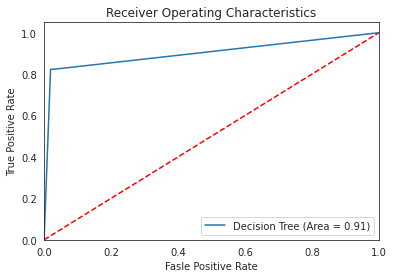


Confusion Matrix
[[101   2]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.88      0.82      0.85        17

    accuracy                           0.96       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
y_pred_dectree = dectree.predict(X_test)

dectree_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dectree_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_dectree = confusion_matrix(y_test,y_pred_dectree)
print("\nConfusion Matrix")
print(confusion_matrix_dectree)

classify_dectree = classification_report(y_test, y_pred_dectree)
print("\nClassification Report")
print(classify_dectree)

In [ ]:
n_nodes = dectree.tree_.node_count
n_nodes

depth = dectree.tree_.max_depth
depth

print('Decision Tree without PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

Decision Tree without PCA
Nodes: 39
Depth: 10


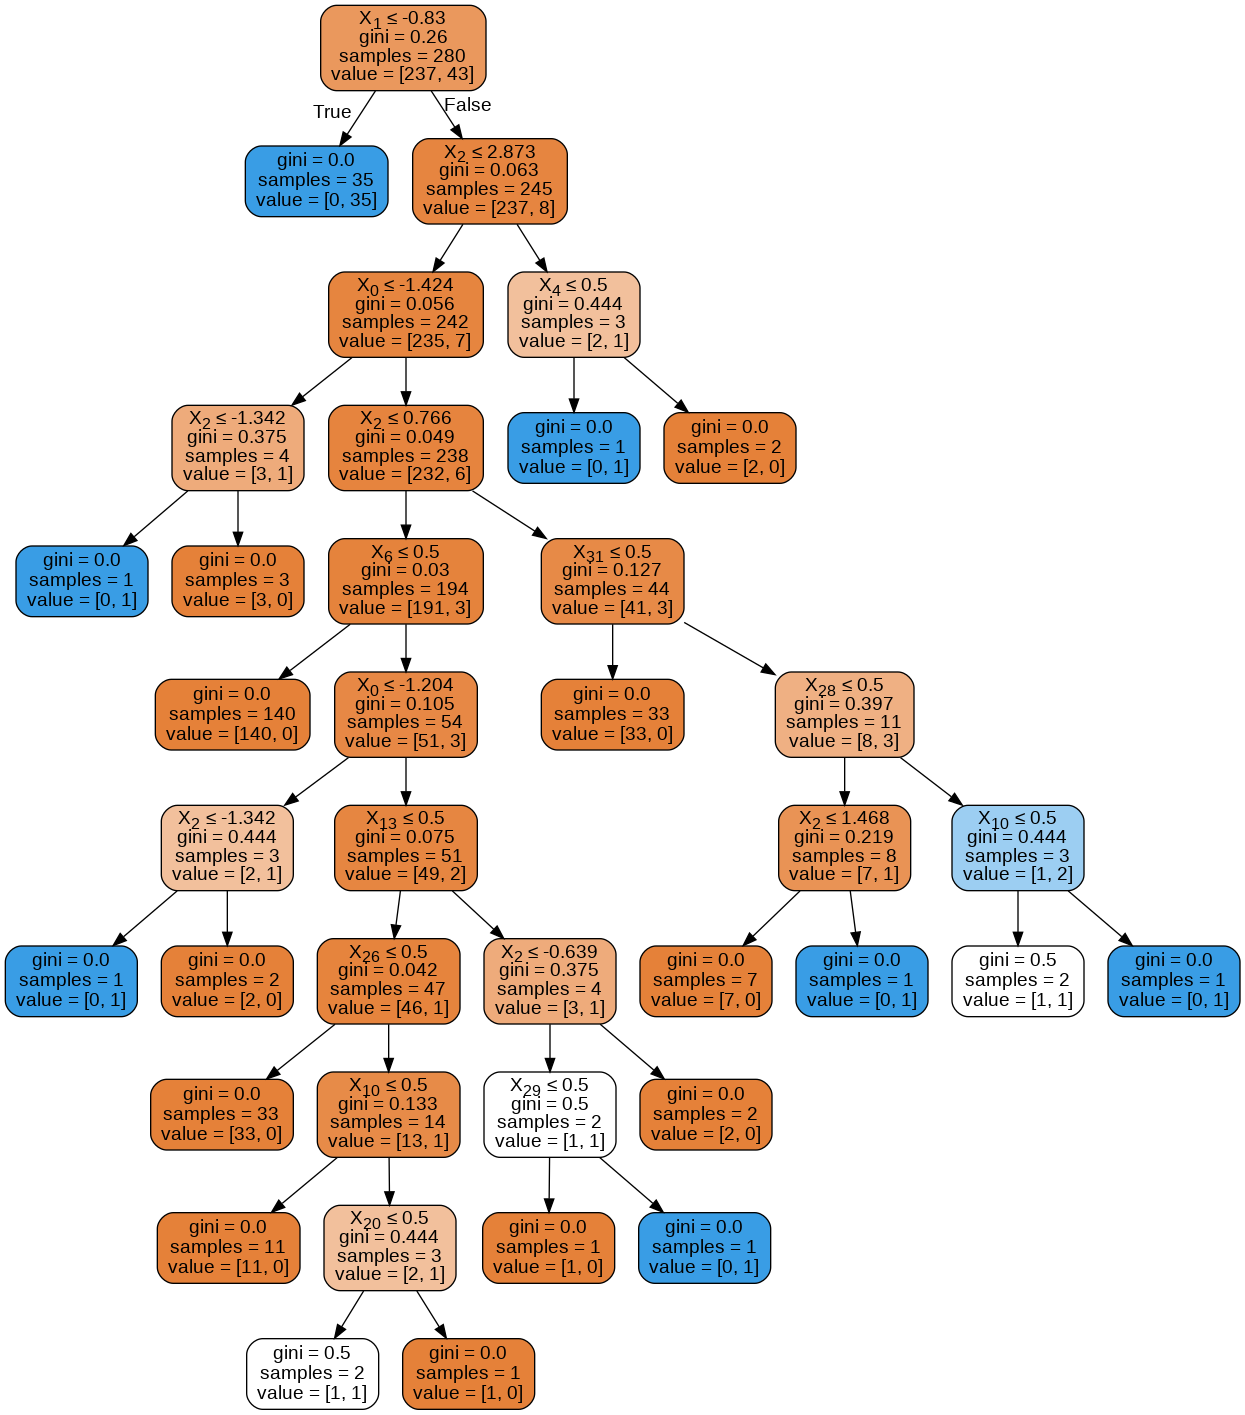

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

KNN WITHOUT PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    
    knn.fit(X_train, y_train)
    
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

end = time.time()
knn_time = end-start
print('Train Time (seconds) of KNN without PCA:',knn_time)

Train Time (seconds) of KNN without PCA: 0.003144502639770508


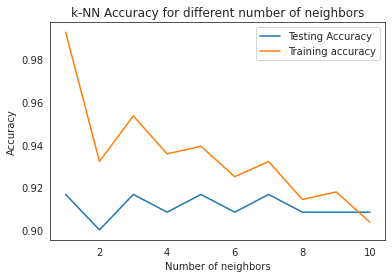

In [ ]:
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

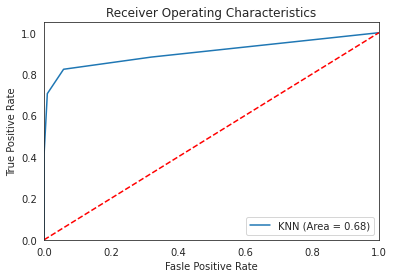


Confusion Matrix
[[103   0]
 [ 11   6]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       103
           1       1.00      0.35      0.52        17

    accuracy                           0.91       120
   macro avg       0.95      0.68      0.74       120
weighted avg       0.92      0.91      0.89       120



In [ ]:
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
print("\nConfusion Matrix")
print(confusion_matrix_knn)

classify_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report")
print(classify_knn)

NAIVE BAYES WITHOUT PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

nb = GaussianNB()
nb.fit(X_train,y_train)

end = time.time()
nb_time = end-start
print('Train Time (seconds) of Naive Bayes without PCA:',nb_time)

Train Time (seconds) of Naive Bayes without PCA: 0.003643035888671875


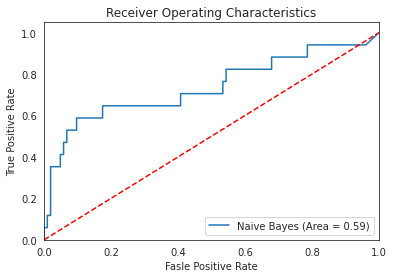


Confusion Matrix
[[30 73]
 [ 2 15]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.29      0.44       103
           1       0.17      0.88      0.29        17

    accuracy                           0.38       120
   macro avg       0.55      0.59      0.37       120
weighted avg       0.83      0.38      0.42       120



In [ ]:
y_pred_nb = nb.predict(X_test)

nb_roc_auc = roc_auc_score(y_test,y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (Area = %0.2f)' % nb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_nb = confusion_matrix(y_test,y_pred_nb)
print("\nConfusion Matrix")
print(confusion_matrix_nb)

classify_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report")
print(classify_nb)

SVM WITHOUT PCA

In [ ]:
from sklearn.svm import SVC

start = time.time()

svc = SVC(kernel = 'rbf', probability = True)
svc.fit(X_train, y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM without PCA:',svm_time)

Train Time (seconds) of SVM without PCA: 0.020505189895629883


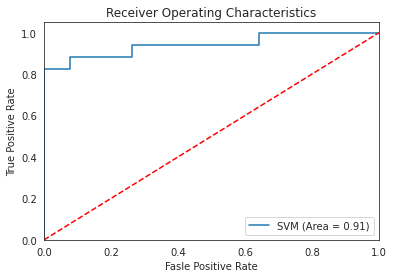


Confusion Matrix
[[103   0]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.82      0.90        17

    accuracy                           0.97       120
   macro avg       0.99      0.91      0.94       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
y_pred_svc = svc.predict(X_test)

svc_roc_auc = roc_auc_score(y_test,y_pred_svc)
fpr, tpr, thresholds = roc_curve(y_test,svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_svc = confusion_matrix(y_test,y_pred_svc)
print("\nConfusion Matrix")
print(confusion_matrix_svc)

classify_svc = classification_report(y_test, y_pred_svc)
print("\nClassification Report")
print(classify_svc)

XGBOOST WITHOUT PCA

In [ ]:
import time
start = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
end = time.time()
xgb_time = end-start
print('Train Time (seconds) of XGBOOST without PCA:',xgb_time)

Train Time (seconds) of XGBOOST without PCA: 0.042946577072143555


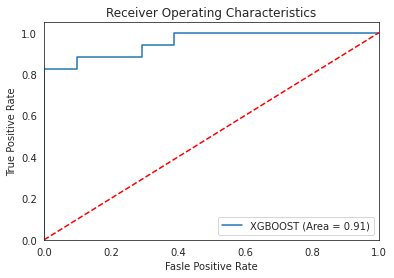


Confusion Matrix
[[103   0]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.82      0.90        17

    accuracy                           0.97       120
   macro avg       0.99      0.91      0.94       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
y_pred_xgb = xgb.predict(X_test)

xgb_roc_auc = roc_auc_score(y_test,y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test,xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
print("\nConfusion Matrix")
print(confusion_matrix_xgb)

classify_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report")
print(classify_xgb)

In [ ]:
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.50%


PCA

In [ ]:
from sklearn.decomposition import PCA


n = 90
pca = PCA(n/100)


pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 15 components


LOGISTIC REGRESSION WITH PCA

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
start = time.time()

logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca,y_train)

end = time.time()
logreg_time_pca = end-start
print('Train Time (seconds) of Logistic Regression with PCA:',logreg_time_pca)

Train Time (seconds) of Logistic Regression with PCA: 0.010006904602050781


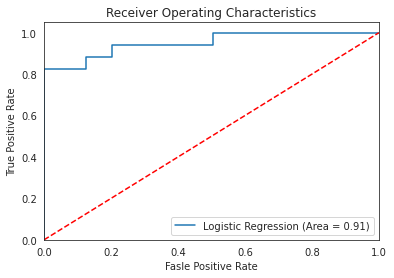


Confusion Matrix
[[103   0]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.82      0.90        17

    accuracy                           0.97       120
   macro avg       0.99      0.91      0.94       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
y_pred_logreg_pca = logreg_pca.predict(X_test_pca)

logreg_roc_auc_pca = roc_auc_score(y_test,y_pred_logreg_pca)
fpr, tpr, thresholds = roc_curve(y_test,logreg_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_logreg_pca = confusion_matrix(y_test,y_pred_logreg_pca)
print("\nConfusion Matrix")
print(confusion_matrix_logreg_pca)

classify_logreg_pca = classification_report(y_test, y_pred_logreg_pca)
print("\nClassification Report")
print(classify_logreg_pca)

DECISION TREE WITH PCA

In [ ]:
start = time.time()

dectree_pca = DecisionTreeClassifier()
dectree_pca.fit(X_train_pca,y_train)

end = time.time()
dectree_time_pca = end-start
print('Train Time (seconds) of Decision Tree with PCA:',dectree_time_pca)

Train Time (seconds) of Decision Tree with PCA: 0.0053331851959228516


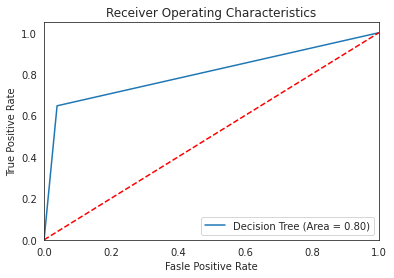


Confusion Matrix
[[99  4]
 [ 6 11]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       103
           1       0.73      0.65      0.69        17

    accuracy                           0.92       120
   macro avg       0.84      0.80      0.82       120
weighted avg       0.91      0.92      0.91       120



In [ ]:
y_pred_dectree_pca = dectree_pca.predict(X_test_pca)

dectree_roc_auc_pca = roc_auc_score(y_test,y_pred_dectree_pca)
fpr, tpr, thresholds = roc_curve(y_test,dectree_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dectree_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_dectree_pca = confusion_matrix(y_test,y_pred_dectree_pca)
print("\nConfusion Matrix")
print(confusion_matrix_dectree_pca)

classify_dectree_pca = classification_report(y_test, y_pred_dectree_pca)
print("\nClassification Report")
print(classify_dectree_pca)

In [ ]:
n_nodes_pca = dectree_pca.tree_.node_count
n_nodes_pca

depth_pca = dectree_pca.tree_.max_depth
depth_pca

print('Decision Tree after PCA')
print('Nodes:',n_nodes_pca)
print('Depth:',depth_pca)

Decision Tree after PCA
Nodes: 37
Depth: 7


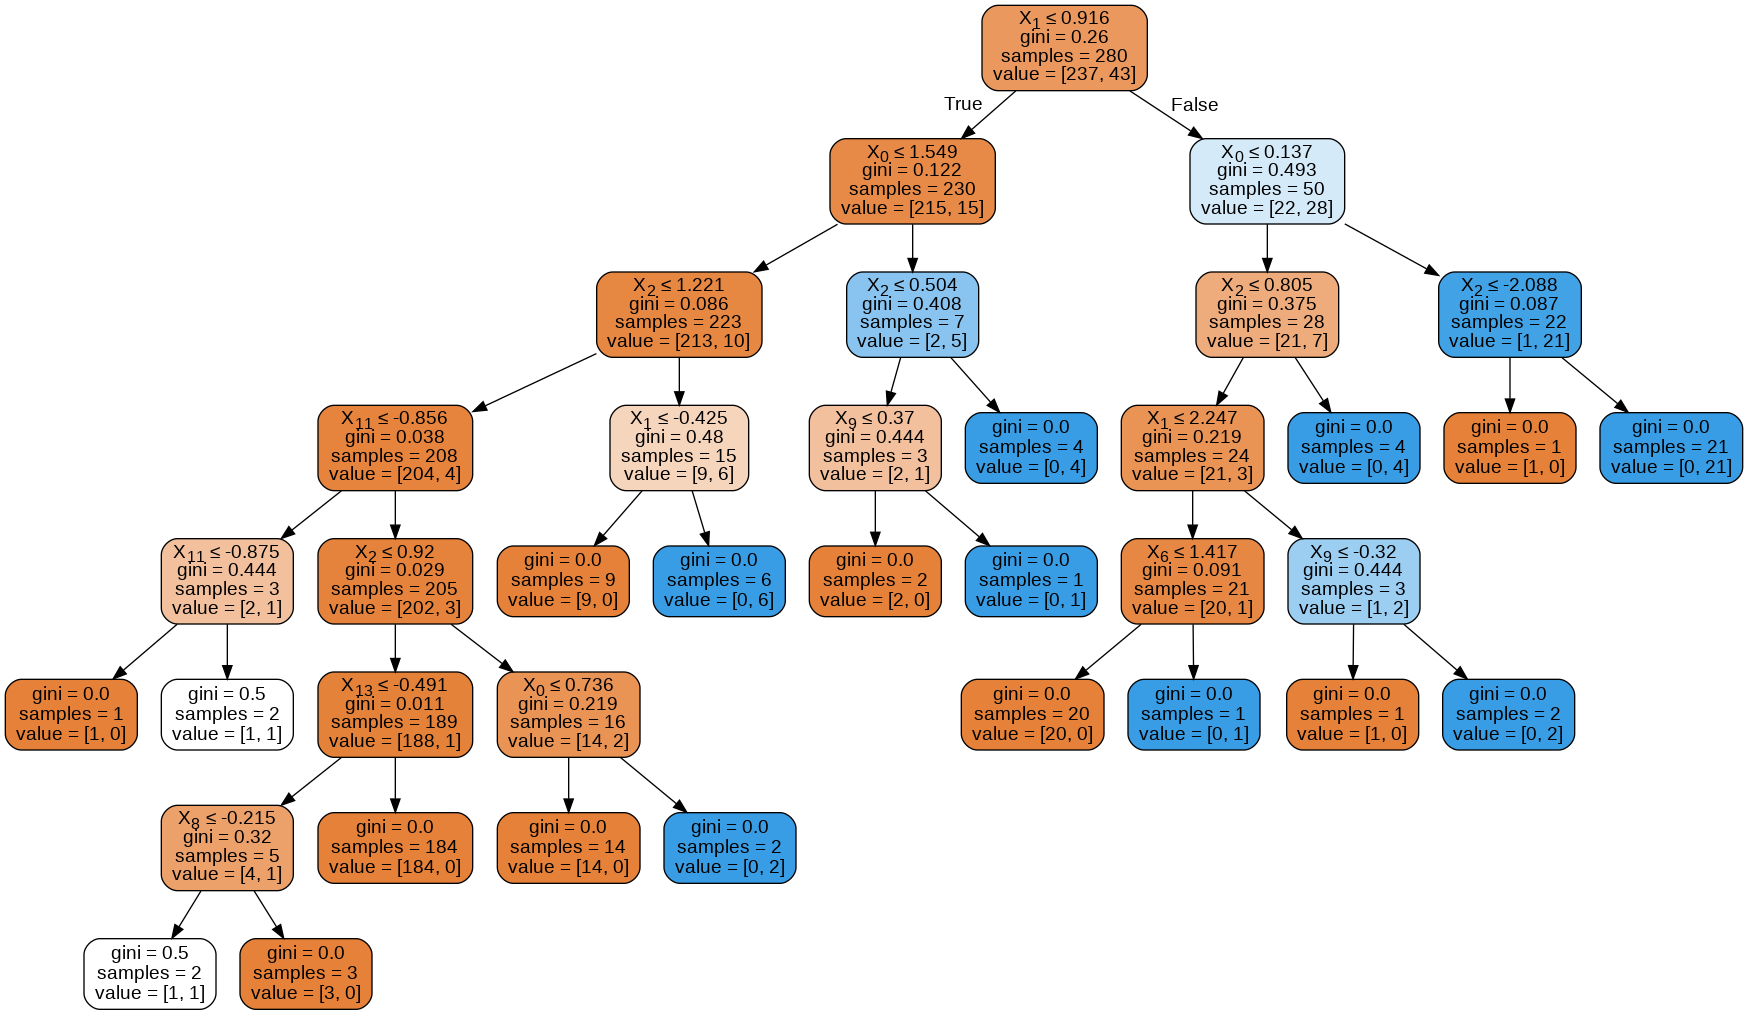

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dectree_pca, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

KNN WITH PCA

In [ ]:
start = time.time()

knn_pca = KNeighborsClassifier(n_neighbors=9)
knn_pca.fit(X_train_pca, y_train)

end = time.time()
knn_time_pca = end-start
print('Train Time (seconds) of KNN with PCA:',knn_time_pca)

Train Time (seconds) of KNN with PCA: 0.0027811527252197266


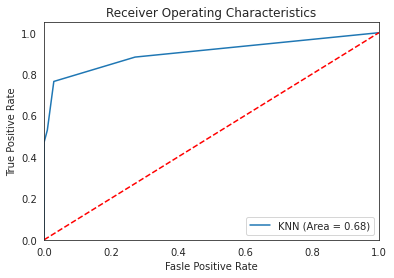


Confusion Matrix
[[103   0]
 [ 11   6]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       103
           1       1.00      0.35      0.52        17

    accuracy                           0.91       120
   macro avg       0.95      0.68      0.74       120
weighted avg       0.92      0.91      0.89       120



In [ ]:
y_pred_knn_pca = knn_pca.predict(X_test_pca)

knn_roc_auc_pca = roc_auc_score(y_test,y_pred_knn_pca)
fpr, tpr, thresholds = roc_curve(y_test,knn_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_knn_pca = confusion_matrix(y_test,y_pred_knn_pca)
print("\nConfusion Matrix")
print(confusion_matrix_knn_pca)

classify_knn_pca = classification_report(y_test, y_pred_knn_pca)
print("\nClassification Report")
print(classify_knn_pca)

NAIVE BAYES WITH PCA

In [ ]:
start = time.time()

nb_pca = GaussianNB()
nb_pca.fit(X_train_pca,y_train)

end = time.time()
nb_time_pca = end-start
print('Train Time (seconds) of Naive Bayes with PCA:',nb_time_pca)

Train Time (seconds) of Naive Bayes with PCA: 0.005465507507324219


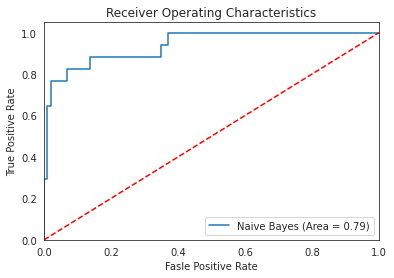


Confusion Matrix
[[102   1]
 [  7  10]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.91      0.59      0.71        17

    accuracy                           0.93       120
   macro avg       0.92      0.79      0.84       120
weighted avg       0.93      0.93      0.93       120



In [ ]:
y_pred_nb_pca = nb_pca.predict(X_test_pca)

nb_roc_auc_pca = roc_auc_score(y_test,y_pred_nb_pca)
fpr, tpr, thresholds = roc_curve(y_test,nb_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (Area = %0.2f)' % nb_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_nb_pca = confusion_matrix(y_test,y_pred_nb_pca)
print("\nConfusion Matrix")
print(confusion_matrix_nb_pca)

classify_nb_pca = classification_report(y_test, y_pred_nb_pca)
print("\nClassification Report")
print(classify_nb_pca)

SVM WITH PCA

In [ ]:
start = time.time()

svc_pca = SVC(kernel = 'rbf', probability = True)
svc_pca.fit(X_train_pca, y_train)

end = time.time()
svm_time_pca = end-start
print('Train Time (seconds) of SVM with PCA:',svm_time_pca)

Train Time (seconds) of SVM with PCA: 0.012184858322143555


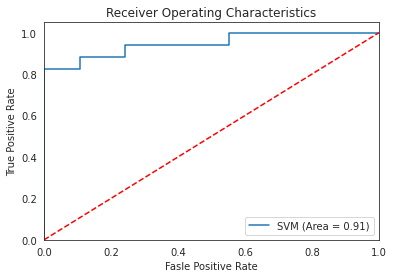


Confusion Matrix
[[103   0]
 [  3  14]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.82      0.90        17

    accuracy                           0.97       120
   macro avg       0.99      0.91      0.94       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
y_pred_svc_pca = svc_pca.predict(X_test_pca)

svc_roc_auc_pca = roc_auc_score(y_test,y_pred_svc_pca)
fpr, tpr, thresholds = roc_curve(y_test,svc_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_svc_pca = confusion_matrix(y_test,y_pred_svc_pca)
print("\nConfusion Matrix")
print(confusion_matrix_svc_pca)

classify_svc_pca = classification_report(y_test, y_pred_svc_pca)
print("\nClassification Report")
print(classify_svc_pca)

XGBOOST ANALYSIS WITH PCA

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
start = time.time()

xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)

end = time.time()
xgb_time_pca = end-start
print('Train Time (seconds) of XGBOOST with PCA:',xgb_time_pca)

Train Time (seconds) of XGBOOST with PCA: 0.03883028030395508


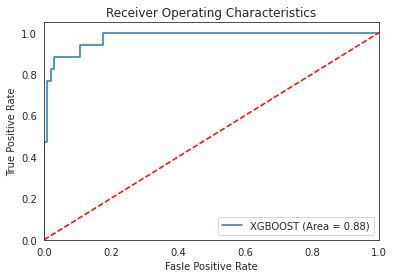


Confusion Matrix
[[102   1]
 [  4  13]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       103
           1       0.93      0.76      0.84        17

    accuracy                           0.96       120
   macro avg       0.95      0.88      0.91       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

xgb_roc_auc_pca = roc_auc_score(y_test,y_pred_xgb_pca)
fpr, tpr, thresholds = roc_curve(y_test,xgb_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (Area = %0.2f)' % xgb_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_xgb_pca = confusion_matrix(y_test,y_pred_xgb_pca)
print("\nConfusion Matrix")
print(confusion_matrix_xgb_pca)

classify_xgb_pca = classification_report(y_test, y_pred_xgb_pca)
print("\nClassification Report")
print(classify_xgb_pca)

ACCURACY ANALYSIS

In [ ]:
accuracy = {'Model': ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbors', 'Naive Bayes', 'SVM','XGBOOST'], 
               'Accuracy - no PCA (%)': [97, 97, 91, 38, 97, 97], 
               'Accuracy - PCA (%)': [97, 92, 91, 93, 97, 96]
              }


acc = pd.DataFrame(data=accuracy)

acc

,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,Logistic Regression,97,97
1,Decision Tree,97,92
2,K Nearest Neighbors,91,91
3,Naive Bayes,38,93
4,SVM,97,97
5,XGBOOST,97,96


In [ ]:
acc = acc.set_index('Model')

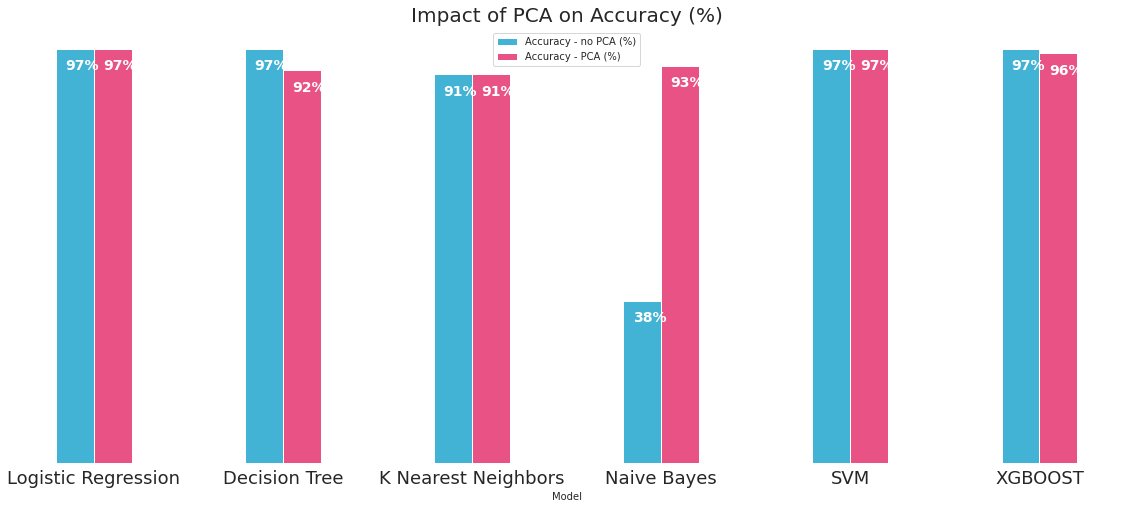

In [ ]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
time = {'Model': ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'XGBOOST'],
                  'Train Time - no PCA (s) ': [logreg_time, dectree_time, knn_time, nb_time, svm_time, xgb_time],
                  'Train Time - PCA (s) ': [logreg_time_pca, dectree_time_pca, knn_time_pca, nb_time_pca, svm_time_pca, xgb_time_pca]
               }


tm = pd.DataFrame(data=time)
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,Logistic Regression,0.021409,0.010007
1,Decision Tree,0.009001,0.005333
2,K Nearest Neighbors,0.003145,0.002781
3,Naive Bayes,0.003643,0.005466
4,SVM,0.020505,0.012185
5,XGBOOST,0.042947,0.038830


In [ ]:
tm = tm.set_index('Model')

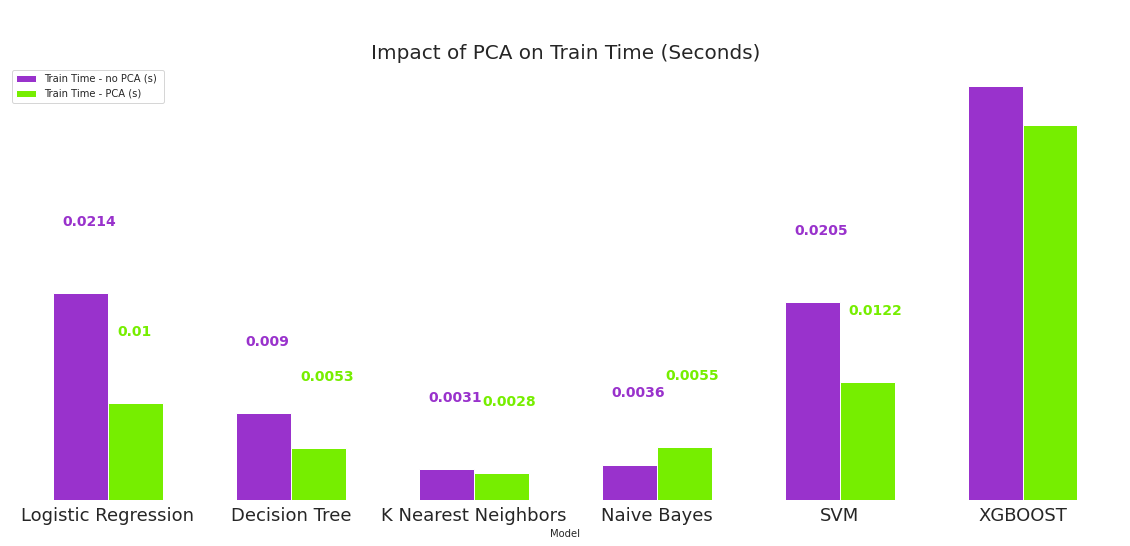

In [ ]:
sns.set_style(style='white')

ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)


for n in range(2):
    for index, val in enumerate(tm.iloc[:,n].transpose()): 
        label=str(round(val,4))
        
        if n==0:
            ax.annotate(label, xy=(index-0.25, val+0.007), color='#9932CC', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val+0.007), color='#76EE00', fontsize=14, fontweight='bold')